### Import libraries

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("dataset_3.csv")
print(len(df))
df.head()

10


Feature1  Feature2  Feature3  Class
0         0         3         1      1
1        -1         0         2      1
2         1         2         3      1
3         2         1         0      1
4         3         3         2      1

### Display all the datapoints

In [3]:
# Example data with 3 features and 2 classes
data = np.array([[0, 3, 1], [-1, 0, 2], [1, 2, 3], [2, 1, 0], [3, 3, 2],
                 [0, 0, 1], [-1, -1, 3], [-3, 1, 0], [3, 1, 2], [2, -2, 3]])
labels = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1])

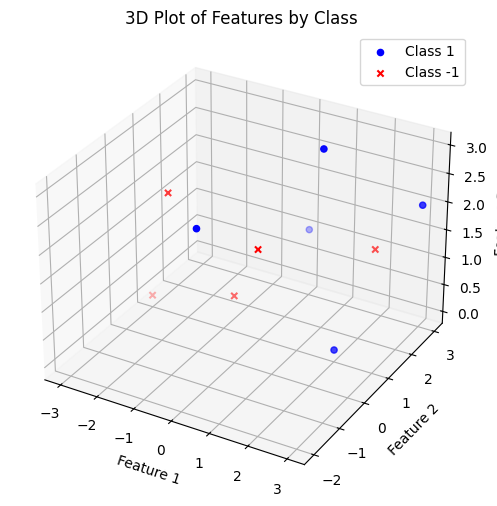

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot points where Class is 1
ax.scatter(df[df['Class'] == 1]['Feature1'], df[df['Class'] == 1]['Feature2'], df[df['Class'] == 1]['Feature3'], 
           color='blue', label='Class 1', marker='o')

# Plot points where Class is -1
ax.scatter(df[df['Class'] == -1]['Feature1'], df[df['Class'] == -1]['Feature2'], df[df['Class'] == -1]['Feature3'], 
           color='red', label='Class -1', marker='x')

# Labeling the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Add a title
ax.set_title('3D Plot of Features by Class')

# Add a legend
ax.legend()

# Show the plot
plt.show()

### Train a model

In [4]:
# Train the SVM model with a linear kernel
svm = SVC(kernel='linear', C=1.0)
svm.fit(data, labels)

SVC(kernel='linear')

### Find alpha

In [8]:
# Retrieve the support vectors and their corresponding alpha values (Lagrange multipliers)
support_vectors_indices = svm.support_
alphas = np.zeros(len(data))  # Initialize alpha values for all points as 0
alphas[support_vectors_indices] = np.abs(svm.dual_coef_[0])  # Assign non-zero alpha values to support vectors

# Print alpha values for all data points
for i, alpha in enumerate(alphas):
    print(f"Data point {data[i]} has alpha value: {alpha}")

Data point [0 3 1] has alpha value: 0.1998431165462395
Data point [-1  0  2] has alpha value: 1.0
Data point [1 2 3] has alpha value: 0.3335372662416612
Data point [2 1 0] has alpha value: 1.0
Data point [3 3 2] has alpha value: 0.0
Data point [0 0 1] has alpha value: 0.9335607909689446
Data point [-1 -1  3] has alpha value: 0.0
Data point [-3  1  0] has alpha value: 0.599819591818956
Data point [3 1 2] has alpha value: 1.0
Data point [ 2 -2  3] has alpha value: 0.0


### Find weights and bias for decission boundry

In [5]:
# Retrieve weights and bias from the model
w = svm.coef_[0]
b = svm.intercept_[0]
print(f"Weight vector (w): {w}")
print(f"Bias term (b): {b}")

Weight vector (w): [0.13299604 0.66678429 0.26689412]
Bias term (b): -1.2672960699832105


### Visualise decission boundry

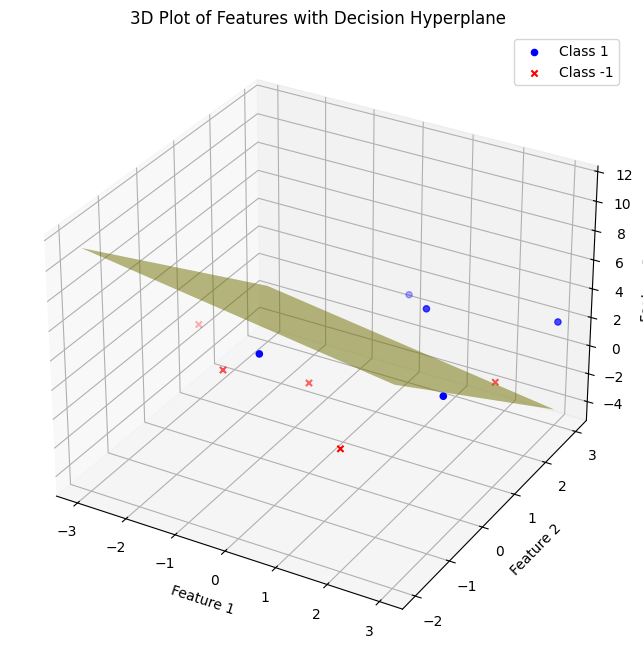

In [6]:
# Create a 3D plot for the data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points where Class is 1
ax.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], data[labels == 1][:, 2], 
           color='blue', label='Class 1', marker='o')

# Plot the data points where Class is -1
ax.scatter(data[labels == -1][:, 0], data[labels == -1][:, 1], data[labels == -1][:, 2], 
           color='red', label='Class -1', marker='x')

# Create a meshgrid to plot the hyperplane
x1_range = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 10)
x2_range = np.linspace(np.min(data[:, 1]), np.max(data[:, 1]), 10)
x1, x2 = np.meshgrid(x1_range, x2_range)

# Compute the corresponding x3 (the decision boundary equation)
x3 = -(w[0] * x1 + w[1] * x2 + b) / w[2]

# Plot the decision hyperplane
ax.plot_surface(x1, x2, x3, color='yellow', alpha=0.5, rstride=100, cstride=100)

# Label the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Add a title and legend
ax.set_title('3D Plot of Features with Decision Hyperplane')
ax.legend()

# Show the plot
plt.show()


### Prediction

In [9]:
# Step 3: Predict class labels for new points with 3 features
new_points = np.array([[0.5, 2.5, 1], [1, 1, 1], [-2, 0, 0], [3, 2, 1]])
#new_points_scaled = scaler.transform(new_points)  # Apply same scaling as training data
predictions = svm.predict(new_points)

# Step 4: Output the results
print(f"New Points (original): \n{new_points}")
print(f"Predicted Labels for New Points: {predictions}")

New Points (original): 
[[ 0.5  2.5  1. ]
 [ 1.   1.   1. ]
 [-2.   0.   0. ]
 [ 3.   2.   1. ]]
Predicted Labels for New Points: [ 1 -1 -1  1]


### Model Evaluation

In [11]:
from sklearn.metrics import accuracy_score
# Step 5: Evaluate the model (optional, based on available test data)
# Here we use the training data itself just to check accuracy
train_predictions = svm.predict(data)
accuracy = accuracy_score(labels, train_predictions)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

Training Accuracy: 70.00%
